In [1]:
EXP_NAME="ViTDCNv3Heavy_tuner_config_ML_1M"
# EXP_NAME="DCNv2_tuner_config_iPinYou"
# EXP_NAME="ViTDCNv2cross_tuner_config_ML_1M"

In [25]:
! pip install pyyaml
! pip install numpy
! pip install matplotlib
! pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 55.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 KB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.0/508.0 KB 31.7 MB/s eta 0:00:00


In [5]:
import yaml
with open(f'config/{EXP_NAME}/model_config.yaml', 'r') as file:
    model_configs = yaml.safe_load(file)
model_configs

{'ViTDCNv3Heavy_ML_1M_001_dbb4d966': {'batch_norm': True,
  'batch_size': 4096,
  'dataset_id': 'ML_1M_7_x1_b220bdc8',
  'debug_mode': False,
  'deep_net_dropout': 0.1,
  'early_stop_patience': 2,
  'embedding_dim': 16,
  'embedding_regularizer': 0.01,
  'epochs': 100,
  'eval_steps': None,
  'feature_config': None,
  'feature_specs': None,
  'group_id': None,
  'layer_norm': True,
  'learning_rate': 0.001,
  'loss': 'binary_crossentropy',
  'metrics': ['logloss', 'AUC'],
  'model': 'ViTDCNv3Heavy',
  'model_root': './checkpoints/',
  'monitor': {'AUC': 1, 'logloss': 0},
  'monitor_mode': 'max',
  'net_regularizer': 0,
  'num_deep_cross_layers': 3,
  'num_heads': 1,
  'num_shallow_cross_layers': 3,
  'num_workers': 16,
  'optimizer': 'adam',
  'pickle_feature_encoder': True,
  'save_best_only': True,
  'seed': 2024,
  'shallow_net_dropout': 0.2,
  'shuffle': True,
  'task': 'binary_classification',
  'use_features': None,
  'verbose': 1,
  'vit_after_steps': 0,
  'vit_hidden_dim': 64,


In [6]:
# from itertools import product
# import yaml

# with open(f'config/{EXP_NAME}.yaml', 'r') as file:
#     config = yaml.safe_load(file)
# tuner_space = config['tuner_space']
# hyperparameters = list(tuner_space.keys())
# params = [k for k, v in tuner_space.items() if type(v) == list and len(v) >=2]
# hyperparameter_values = []

# for hp in hyperparameters:
#     value = tuner_space[hp]
#     if isinstance(value, list):
#         hyperparameter_values.append(value)
#     else:
#         hyperparameter_values.append([value])

# combinations = [dict(zip(hyperparameters, values)) for values in product(*hyperparameter_values)]
# combinations[:5]

In [21]:
import csv
import re
import numpy as np
import matplotlib.pyplot as plt
import yaml

results = []
with open(f"{EXP_NAME}.csv", 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        config_key = row[2].split()[1]
        test_column = row[6]
        match = re.search(r'logloss: ([0-9.]+) - AUC: ([0-9.]+)', test_column)
        if match:
            logloss = float(match.group(1))
            auc = float(match.group(2))
            result = {'logloss': logloss, 'AUC': auc}
            result.update(model_configs[config_key])
            results.append(result)

In [22]:
results

[{'logloss': 0.319545,
  'AUC': 0.854727,
  'batch_norm': True,
  'batch_size': 4096,
  'dataset_id': 'ML_1M_7_x1_b220bdc8',
  'debug_mode': False,
  'deep_net_dropout': 0.1,
  'early_stop_patience': 2,
  'embedding_dim': 16,
  'embedding_regularizer': 0.01,
  'epochs': 100,
  'eval_steps': None,
  'feature_config': None,
  'feature_specs': None,
  'group_id': None,
  'layer_norm': True,
  'learning_rate': 0.001,
  'loss': 'binary_crossentropy',
  'metrics': ['logloss', 'AUC'],
  'model': 'ViTDCNv3Heavy',
  'model_root': './checkpoints/',
  'monitor': {'AUC': 1, 'logloss': 0},
  'monitor_mode': 'max',
  'net_regularizer': 0,
  'num_deep_cross_layers': 3,
  'num_heads': 1,
  'num_shallow_cross_layers': 3,
  'num_workers': 16,
  'optimizer': 'adam',
  'pickle_feature_encoder': True,
  'save_best_only': True,
  'seed': 2024,
  'shallow_net_dropout': 0.2,
  'shuffle': True,
  'task': 'binary_classification',
  'use_features': None,
  'verbose': 1,
  'vit_after_steps': 0,
  'vit_hidden_dim'

In [58]:
import pandas as pd

df = pd.DataFrame(results)
df

,logloss,AUC,batch_norm,batch_size,dataset_id,debug_mode,deep_net_dropout,early_stop_patience,embedding_dim,embedding_regularizer,...,shallow_net_dropout,shuffle,task,use_features,verbose,vit_after_steps,vit_hidden_dim,vit_num_heads,vit_num_layers,vit_patch_size
0,0.319545,0.854727,True,4096,ML_1M_7_x1_b220bdc8,False,0.1,2,16,0.01,...,0.2,True,binary_classification,None,1,0,64,4,1,8
1,0.317746,0.854209,True,4096,ML_1M_7_x1_b220bdc8,False,0.1,2,16,0.01,...,0.2,True,binary_classification,None,1,0,64,4,2,4
2,0.318329,0.853919,True,4096,ML_1M_7_x1_b220bdc8,False,0.1,2,16,0.01,...,0.2,True,binary_classification,None,1,0,64,4,1,4
3,0.318608,0.854023,True,4096,ML_1M_7_x1_b220bdc8,False,0.1,2,16,0.01,...,0.2,True,binary_classification,None,1,4,64,4,1,4
4,0.317225,0.854939,True,4096,ML_1M_7_x1_b220bdc8,False,0.1,2,16,0.01,...,0.2,True,binary_classification,None,1,2,64,4,1,4
5,0.319792,0.853778,True,4096,ML_1M_7_x1_b220bdc8,False,0.1,2,16,0.01,...,0.2,True,binary_classification,None,1,4,64,4,1,8
6,0.318443,0.853826,True,4096,ML_1M_7_x1_b220bdc8,False,0.1,2,16,0.01,...,0.2,True,binary_classification,None,1,4,64,4,2,4
7,0.318830,0.854294,True,4096,ML_1M_7_x1_b220bdc8,False,0.1,2,16,0.01,...,0.2,True,binary_classification,None,1,2,64,4,2,4
8,0.319796,0.854162,True,4096,ML_1M_7_x1_b220bdc8,False,0.1,2,16,0.01,...,0.2,True,binary_classification,None,1,2,64,4,1,8
9,0.320227,0.853163,True,4096,ML_1M_7_x1_b220bdc8,False,0.1,2,16,0.01,...,0.2,True,binary_classification,None,1,0,64,4,1,4


In [70]:
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).astype('string')

In [72]:
df.dropna()

,logloss,AUC,batch_norm,batch_size,dataset_id,debug_mode,deep_net_dropout,early_stop_patience,embedding_dim,embedding_regularizer,...,shallow_net_dropout,shuffle,task,use_features,verbose,vit_after_steps,vit_hidden_dim,vit_num_heads,vit_num_layers,vit_patch_size


In [81]:
metrics = ["logloss", "AUC"]
hyperparam_lst = set(df.columns) - set(metrics)
more_than_two_cols = [param for param in list(hyperparam_lst) if len(df[param].unique()) > 1 ]
more_than_two_cols

['vit_num_layers',
 'vit_after_steps',
 'num_shallow_cross_layers',
 'vit_patch_size']

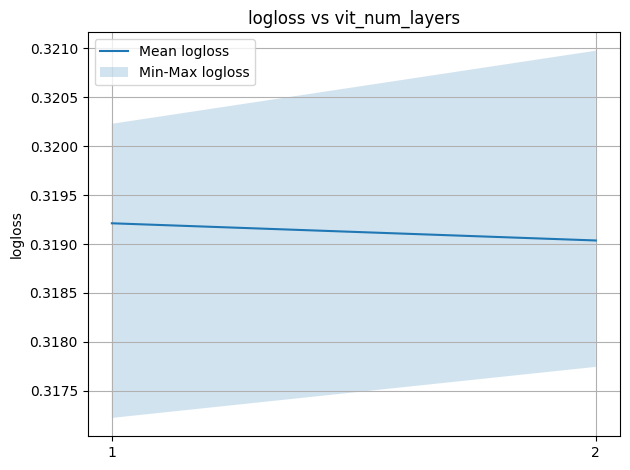

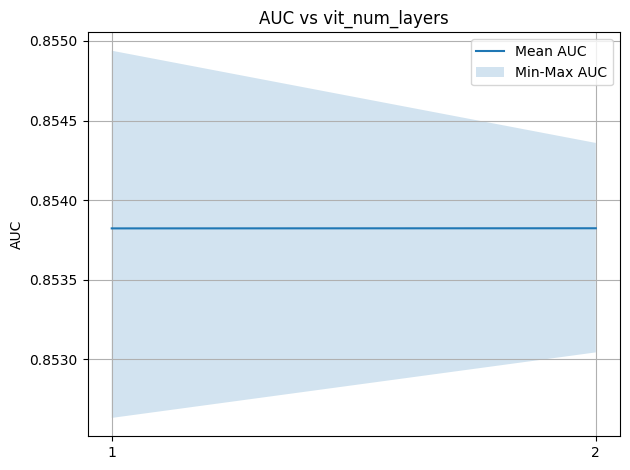

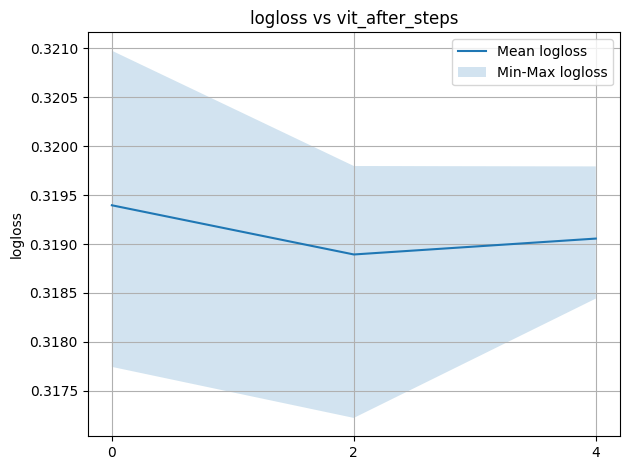

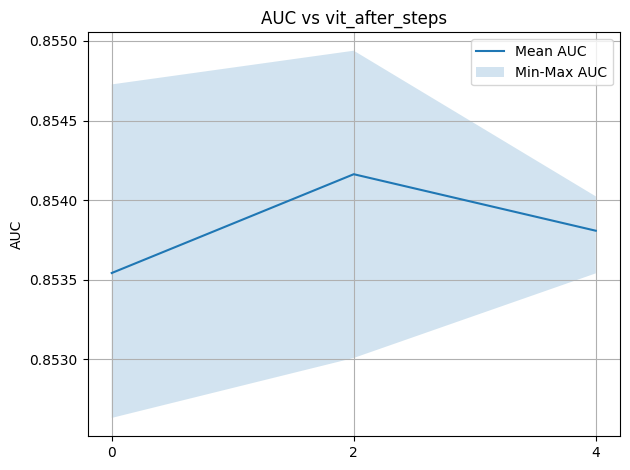

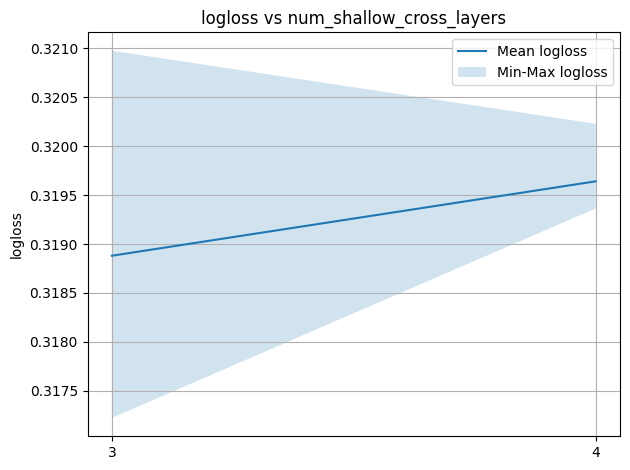

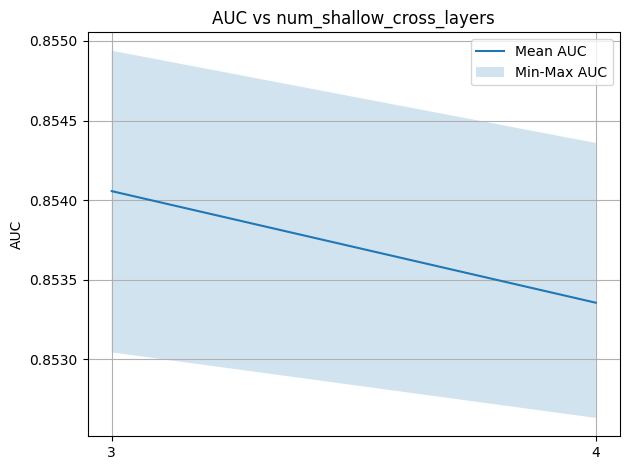

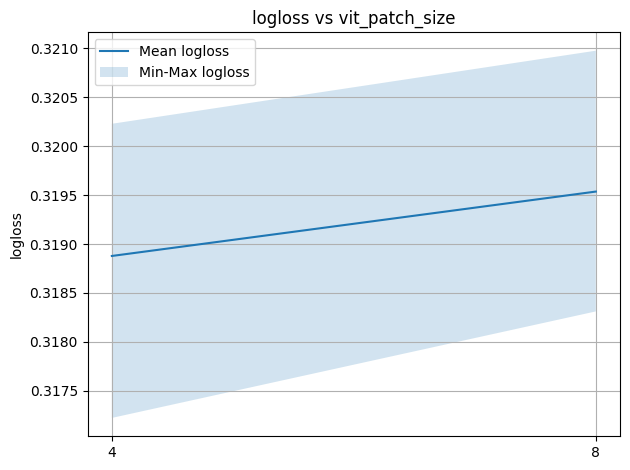

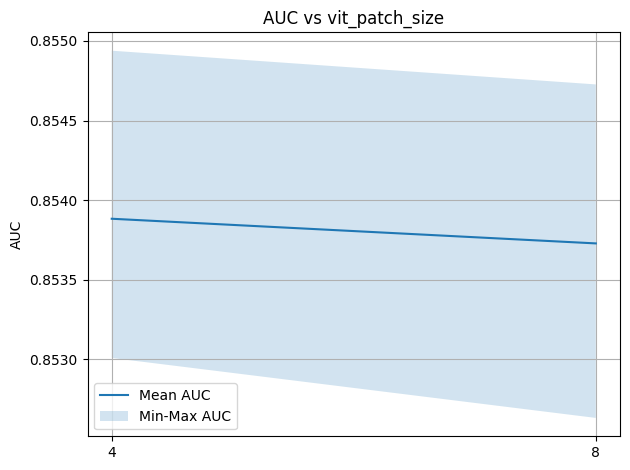

In [100]:
for param in more_than_two_cols:
    unique_values = df[param].unique()
    logloss_lst, auc_lst = [], []

    try:
        unique_values = sorted(unique_values)
    except:
        pass
    for value in unique_values:
        logloss_result = df[df[param] == value]["logloss"]
        auc_result = df[df[param] == value]["AUC"]

        logloss_lst.append([logloss_result.min(), logloss_result.mean(), logloss_result.max()])
        auc_lst.append([auc_result.min(), auc_result.mean(), auc_result.max()])
    logloss_lst = np.array(logloss_lst)
    auc_lst = np.array(auc_lst)
    metric_dict = {
        "logloss": logloss_lst,
        "AUC": auc_lst
    }
    # for metric in metrics:
    #     print(np.arange(len(metric_dict[metric])))
    #     print(metric_dict[metric][:, 1])
    for metric in metrics:
        plt.figure()
        plt.plot(np.arange(len(metric_dict[metric])), metric_dict[metric][:, 1], label=f'Mean {metric}')
        plt.fill_between(np.arange(len(metric_dict[metric])), metric_dict[metric][:, 0], metric_dict[metric][:, 2], alpha=0.2, label=f'Min-Max {metric}')
        plt.xticks(np.arange(len(metric_dict[metric])), unique_values)
        plt.ylabel(metric)
        plt.title(f'{metric} vs {param}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

In [101]:
results

[{'logloss': 0.319545,
  'AUC': 0.854727,
  'batch_norm': True,
  'batch_size': 4096,
  'dataset_id': 'ML_1M_7_x1_b220bdc8',
  'debug_mode': False,
  'deep_net_dropout': 0.1,
  'early_stop_patience': 2,
  'embedding_dim': 16,
  'embedding_regularizer': 0.01,
  'epochs': 100,
  'eval_steps': None,
  'feature_config': None,
  'feature_specs': None,
  'group_id': None,
  'layer_norm': True,
  'learning_rate': 0.001,
  'loss': 'binary_crossentropy',
  'metrics': ['logloss', 'AUC'],
  'model': 'ViTDCNv3Heavy',
  'model_root': './checkpoints/',
  'monitor': {'AUC': 1, 'logloss': 0},
  'monitor_mode': 'max',
  'net_regularizer': 0,
  'num_deep_cross_layers': 3,
  'num_heads': 1,
  'num_shallow_cross_layers': 3,
  'num_workers': 16,
  'optimizer': 'adam',
  'pickle_feature_encoder': True,
  'save_best_only': True,
  'seed': 2024,
  'shallow_net_dropout': 0.2,
  'shuffle': True,
  'task': 'binary_classification',
  'use_features': None,
  'verbose': 1,
  'vit_after_steps': 0,
  'vit_hidden_dim'

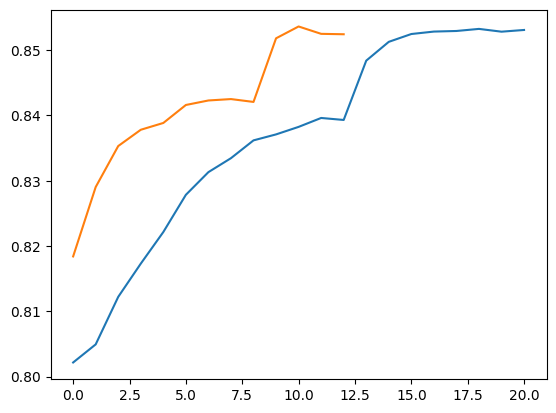

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

vits = [
    0.802154, 0.804925, 0.812207, 0.817295, 0.822139, 0.827837, 0.831312, 0.833450, 0.836177, 0.837092, 0.838243, 0.839610, 0.839304, 0.848389, 0.851271, 0.852469, 0.852843, 0.852934, 0.853253, 0.852827, 0.853089
]

dcnv2 = [
    0.818400, 0.829029, 0.835310, 0.837802, 0.838844, 0.841598, 0.842289, 0.842503, 0.842066, 0.851811, 0.853624, 0.852496, 0.852433
]

plt.plot(np.arange(len(vits)), vits)
plt.plot(np.arange(len(dcnv2)), dcnv2)